<center><h1 style='color: #36A7A2; font-size: 50px'>Text Mining</h1></center>
<center><h2 style='color: #434e52'>Group Project</h2></center>
<center><h5 style='font-weight:normal; font-style: normal;'>Abdallah Zaher, M20190684</h5></center>
<center><h5 style='font-weight:normal; font-style: normal;'>Cristina Mousinho, M20190303</h5></center>
<center><h5 style='font-weight:normal; font-style: normal;'>Gabriel Ravi, M20190925</h5></center>

<hr>

<h2 style='color: #434e52'>Downloading and impaorting packages</h2>

In [1]:
# If you don't have nltklibrary installed, please un-comment the following line of code:
# nltk.download()

In [2]:
#Importing libraries

import pandas as pd
import os
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from bs4 import BeautifulSoup
import string
from tqdm import tqdm_notebook as tqdm
import re 
import numpy as np
import matplotlib.pyplot as plt
from itertools import islice
from random import randint
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error, median_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
pd.options.display.max_colwidth = 500
warnings.filterwarnings("ignore", category=DeprecationWarning) 

<hr>
<h2 style='color: #434e52'>Loading and checking the data</h2>

In [3]:
#Creating an empty dataframe
train_df = pd.DataFrame(columns=['Author', 'Text'])

In [4]:
#Filling the dataframe with the provided texts
author_list = ['AlmadaNegreiros','CamiloCasteloBranco','EcaDeQueiros','JoseRodriguesSantos',
               'JoseSaramago','LuisaMarquesSilva']

for author in author_list:
    go_to = './Corpora/Train/'+author
    for filename in os.listdir(go_to):
        open_filename = go_to+"/"+filename
        f = open(open_filename, "r", encoding="utf-8")
        train_df = train_df.append({'Author': author, 'Text': f.read()}, ignore_index=True)
        f.close()

In [5]:
#Checking what we are dealing with
train_df.head(5)

,Author,Text
0,AlmadaNegreiros,"Title: A Scena do Odio\n\nAuthor: José de Almada Negreiros\n\nRelease Date: September 16, 2007 [EBook #22615]\n\nLanguage: Portuguese\n\n\n\n\nA ALVARO DE CAMPOS\n\n_Excerptos de um poema desbaratado\nque foi escripto durante os\ntrês dias e as três noites que durou\na revolução de 14 de Maio de 1915._\n\n\nSatanizo-Me Tara na Vara de Moysés!\nO castigo das serpentes é-Me riso nos dentes,\nInferno a arder o Meu cantar!\nSou Vermelho-Niagára dos sexos escancarados nos chicotes dos cossacos!\n..."
1,AlmadaNegreiros,"Title: O Jardim da Pierrette\n\nAuthor: José de Almada Negreiros\n\nRelease Date: September 23, 2007 [EBook #22730]\n\nLanguage: Portuguese\n\n\n\n\n\n+Argumento do bailado+\n\n\nPierrot n'aquella noite depois de muito pensar disse que queria\nmorrer. Pierrot, coitado, tinha razão: Um dia inteiro sem ver\nPierrette não é viver!\n\nDeitou-se muito cançado n'um jardim qualquer. Havia luz no\npalacio e uma linda menina a fazer serão. Pois logo quiz\nDeus Nosso Senhor que fôsse _O JARDIM DE PIER..."
2,AlmadaNegreiros,"\n\nTitle: A Invenção do Dia Claro\n\nAuthor: José de Almada Negreiros\n\nRelease Date: September 29, 2007 [EBook #22801]\n\nLanguage: Portuguese\n\n\n\n\n\n\nEscripta de uma só maneira para todas as espécies de orgulho,\nseguida das démarches para a Invenção e acompanhada das confidencias\nmais intimas e geraes.\n\nEnsaios para a iniciação de portuguezes na revelação da pintura\n\nCom um retrato do autor por elle-proprio\n\n\nprimeiro milhar\n\n\nLISBÔA\n""OLISIPO"", APARTADO 145\n\n1921\n\n\..."
3,AlmadaNegreiros,"\nTitle: Litoral\n A Amadeo de Souza Cardozo\n\nAuthor: José de Almada Negreiros\n\nContributor: Amadeu de Sousa Cardoso\n\nRelease Date: September 29, 2007 [EBook #22802]\n\nLanguage: Portuguese\n\n\n\n\n\n\nespasmos de praiamar transbordam invasão\na areia mergulha pró fundo do Mar plos olhos do\n pirata\n desvirgados á prôa\nMaresia cio do Mar\n qué da vela Latina?\n Sinhora da Livramento\n ..."
4,AlmadaNegreiros,\n\n\nEXPOSIÇÃO\n\n+amadeo\nde souza\ncardoso+\n\nLIGA NAVAL DE LISBOA\n\n\nEm Portugal existe uma unica opinião sobre Arte e abrange uma tão\ncolossal maioria que receio que ella impere por esmagamento. Essa\nopinião é a do Ex.^mo sr. dr. José de Figueiredo (gago do governo).\n\nNão é porque este snr tenha opinião nem que este snr seja da igualha\ndo resto de Portugal mas o resto de Portugal e este senhor em materia\nde opinião são da mesma igualha. Um dia um senhor grisalho disse-me em\nme...


In [6]:
train_df.shape

(63, 2)

<hr>

<h2 style='color: #434e52'>Initial Preprocessing</h2>

<h3 style='color: #36A7A2'>1. Removing headers and footers</h3>

In [7]:
#Excerpts of the files to keep: (all done by hand)

cut = [(290, 2107), (164, 1929), (959, 34603), (198, 4648), (64, 3363), (1204, 39928), (56502, 71664), (3499, 70772),
       (4743, 5113), (404, 60822), (1930, 339591), (1640, 280339), (1230, 298096), (199, 38852), (1140, 143674), (248, 314353),
       (24, 84206), (29, 24266), (252, 31963), (191, 30330), (400, 266406), (307, 273787), (4352, 251854), (2238, 297280),
       (2661, 444431), (58, 264805), (3797, 145308), (56, 107432), (1247, 264838), (51, 41150), (110, 279912), 
       (203, 330854), (2989, 412646), (201, 1287406), (1975, 1122924), (377, 910672), (178, 808231), (0, 810135), 
       (0, 773901), (42, 1043627), (1205, 656146), (2279, 759773), (92, 637742), (405, 383096), (3245, 238394), 
       (46, 452946), (23, 598056), (262, 637467), (876, 671576), (48, 795860), (46, 32027), (39, 587471), (32, 480371), 
       (3105, 343315), (0, 17781), (418, 31902), (467, 40111), (0, 11131), (403, 52503), (0, 19423), (390, 6094), 
       (406, 25708), (391, 37606)]

In [8]:
for i in range (0, train_df.shape[0]):
    train_df.iloc[i,1] = train_df.iloc[i,1][cut[i][0]:cut[i][1]+1]

In [9]:
train_df.head(5)

,Author,Text
0,AlmadaNegreiros,"Satanizo-Me Tara na Vara de Moysés!\nO castigo das serpentes é-Me riso nos dentes,\nInferno a arder o Meu cantar!\nSou Vermelho-Niagára dos sexos escancarados nos chicotes dos cossacos!\nSou Pan-Demonio-Trifauce enfermiço de Gula!\nSou Genio de Zarathustra em Taças de Maré-Alta!\nSou Raiva de Medusa e Damnação do Sol!\n\nLadram-Me a Vida por vivê-La\ne só me deram Uma!\nHão-de lati-La por sina!\nagora quero vivê-La!\nHei-de Poeta cantá-La em Gala sonora e dina!\nHei-de Gloria desannuviá-La!\..."
1,AlmadaNegreiros,"Pierrot n'aquella noite depois de muito pensar disse que queria\nmorrer. Pierrot, coitado, tinha razão: Um dia inteiro sem ver\nPierrette não é viver!\n\nDeitou-se muito cançado n'um jardim qualquer. Havia luz no\npalacio e uma linda menina a fazer serão. Pois logo quiz\nDeus Nosso Senhor que fôsse _O JARDIM DE PIERRETTE_.\n\nPierrot não quiz acreditar mas depois ficou muito contente.\nProcurou uma pedrinha e atirou-a. Pierrette ouviu, espreitou\nmas não viu ninguem porque Pierrot tinha-se e..."
2,AlmadaNegreiros,"Entrei numa livraria. Puz-me a contar os livros que ha para\nler e os anos que terei de vida. Não chegam, não duro nem para\nmetade da livraria.\n\nDeve certamente haver outras maneiras de se salvar uma pessoa,\nsenão estou perdido.\n\nNo entanto, as pessoas que entravam na livraria estavam todas\nmuito bem vestidas de quem precisa salvar-se.\n\n * * * * *\n\nComprei um livro de filosofia. Filosofia é a sciencia que trata\nda vida; era justamente do que eu neces..."
3,AlmadaNegreiros,espasmos de praiamar transbordam invasão\na areia mergulha pró fundo do Mar plos olhos do\n pirata\n desvirgados á prôa\nMaresia cio do Mar\n qué da vela Latina?\n Sinhora da Livramento\n Leilão de salvados\nGuarda Fiscal a Costa\n Forte da Barra\no retrato do Piloto a cêbo d'Hollanda e limão dôce\nsabots d'Alfandega e cachimbo motor\n Taverna Mari...
4,AlmadaNegreiros,Em Portugal existe uma unica opinião sobre Arte e abrange uma tão\ncolossal maioria que receio que ella impere por esmagamento. Essa\nopinião é a do Ex.^mo sr. dr. José de Figueiredo (gago do governo).\n\nNão é porque este snr tenha opinião nem que este snr seja da igualha\ndo resto de Portugal mas o resto de Portugal e este senhor em materia\nde opinião são da mesma igualha. Um dia um senhor grisalho disse-me em\nmeia-hora os seus conhecimentos sobre Arte. Quando acabou a meia-hora\ndescobr...






<h3 style='color: #36A7A2'>2.  Cleaning and Preprocessing</h3>

In [10]:
def word_counter(text_list):
    """
    Function that receives a list of strings and returns the frequency of each word
    in the set of all strings.
    """
    words_in_df = ' '.join(text_list).split()
    # Count all words 
    freq = pd.Series(words_in_df).value_counts()
    return freq
# word_counter(list(train_df['Text']))[:25]

In [11]:
stop = set(stopwords.words('portuguese'))
# exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
snowball_stemmer = SnowballStemmer('portuguese')

In [12]:
def clean(text_list, lemmatize, stemmer):
    """
    Function that a receives a list of strings and preprocesses it.
    
    :param text_list: List of strings.
    :param lemmatize: Tag to apply lemmatization if True.
    :param stemmer: Tag to apply the stemmer if True.
    """
    updates = []
    for j in tqdm(range(len(text_list))):
        
        text = text_list[j]
        
        #LOWERCASING TEXT
        text = text.lower()
        
        #REMOVING NUMERICAL DATA
        # text = re.sub("[^a-zA-Z0-9µùàçéèçÇ'\u00B5-\u00FF.,]", ' ', text)
        text = re.sub("[^a-zA-Z]0-9µùàçéèçÇ", ' ', text)
        
        #REMOVE TAGS
        text = BeautifulSoup(text).get_text()
        
        if lemmatize:
            text = " ".join(lemma.lemmatize(word) for word in text.split())
        
        if stemmer:
            text = " ".join(snowball_stemmer.stem(word) for word in text.split())
        
        updates.append(text)
        
    return updates

def update_df(dataframe, list_updated):
    dataframe.update(pd.DataFrame({"Text": list_updated}))

In [13]:
updates = clean(train_df["Text"], lemmatize = True, stemmer = False)

In [14]:
# updates = clean(train_df["Text"], lemmatize = True, stemmer = True)

In [15]:
#Checking the current state of the dataframe
update_df(train_df, updates)
train_df.head(5)

,Author,Text
0,AlmadaNegreiros,"satanizo-me tara na vara de moysés! o castigo da serpentes é-me riso no dentes, inferno a arder o meu cantar! sou vermelho-niagára do sexos escancarados no chicotes do cossacos! sou pan-demonio-trifauce enfermiço de gula! sou genio de zarathustra em taças de maré-alta! sou raiva de medusa e damnação do sol! ladram-me a vida por vivê-la e só me deram uma! hão-de lati-la por sina! agora quero vivê-la! hei-de poeta cantá-la em gala sonora e dina! hei-de gloria desannuviá-la! hei-de guindaste iç..."
1,AlmadaNegreiros,"pierrot n'aquella noite depois de muito pensar disse que queria morrer. pierrot, coitado, tinha razão: um dia inteiro sem ver pierrette não é viver! deitou-se muito cançado n'um jardim qualquer. havia luz no palacio e uma linda menina a fazer serão. poi logo quiz deus nosso senhor que fôsse _o jardim de pierrette_. pierrot não quiz acreditar ma depois ficou muito contente. procurou uma pedrinha e atirou-a. pierrette ouviu, espreitou ma não viu ninguem porque pierrot tinha-se escondido entre ..."
2,AlmadaNegreiros,"entrei numa livraria. puz-me a contar o livros que ha para ler e o ano que terei de vida. não chegam, não duro nem para metade da livraria. deve certamente haver outras maneiras de se salvar uma pessoa, senão estou perdido. no entanto, a pessoas que entravam na livraria estavam toda muito bem vestidas de quem precisa salvar-se. * * * * * comprei um livro de filosofia. filosofia é a sciencia que trata da vida; era justamente do que eu necessitava--pôr sciencia na minha vida. li o livro de fil..."
3,AlmadaNegreiros,espasmos de praiamar transbordam invasão a areia mergulha pró fundo do mar plo olhos do pirata desvirgados á prôa maresia cio do mar qué da vela latina? sinhora da livramento leilão de salvados guarda fiscal a costa forte da barra o retrato do piloto a cêbo d'hollanda e limão dôce sabot d'alfandega e cachimbo motor taverna maritima kean marujo inglez nivel +12+ cuidado co'os helix +belfast+ a grande cheia atavismos do diluvio o mêdo da rochas encolhidas ao luar onanista redemoinhos do perigo...
4,AlmadaNegreiros,em portugal existe uma unica opinião sobre arte e abrange uma tão colossal maioria que receio que ella impere por esmagamento. essa opinião é a do ex.^mo sr. dr. josé de figueiredo (gago do governo). não é porque este snr tenha opinião nem que este snr seja da igualha do resto de portugal ma o resto de portugal e este senhor em materia de opinião são da mesma igualha. um dia um senhor grisalho disse-me em meia-hora o seus conhecimentos sobre arte. quando acabou a meia-hora descobri que o con...


<hr>

<h2 style='color: #434e52'>Descriptive analysis </h2>

<h3 style='color: #36A7A2'>Bag-of-words</h3>

Each word is a feature. Our feature space is defined by our vocabulary. Documents/pieces of text will be represented as sparse vectors.

In [16]:
stop = set(stopwords.words('portuguese'))
# cv = CountVectorizer(max_df=0.9, binary=True)
cv = CountVectorizer(
    max_df=0.8,
    stop_words=stop,
    max_features=10000, 
    ngram_range=(1,3)
)

In [17]:
X = cv.fit_transform(train_df["Text"])
y = np.array(train_df["Author"])

In [18]:
X.shape

(63, 10000)

In [19]:
list(cv.vocabulary_.keys())[:10]

['vara',
 'castigo',
 'riso',
 'dentes',
 'inferno',
 'arder',
 'cantar',
 'vermelho',
 'demonio',
 'gula']

<h3 style='color: #36A7A2'>N-grams analysis</h3>

In [20]:
def get_top_n_grams(corpus, top_k, n):
    """
    Function that receives a list of documents (corpus) and extracts
        the top k most frequent n-grams for that corpus.
        
    :param corpus: list of texts
    :param top_k: int with the number of n-grams that we want to extract
    :param n: n gram type to be considered 
             (if n=1 extracts unigrams, if n=2 extracts bigrams, ...)
             
    :return: Returns a sorted dataframe in which the first column 
        contains the extracted ngrams and the second column contains
        the respective counts
    """
    vec = CountVectorizer(ngram_range=(n, n), max_features=2000).fit(corpus)
    
    bag_of_words = vec.transform(corpus)
    
    sum_words = bag_of_words.sum(axis=0) 
    
    words_freq = []
    for word, idx in vec.vocabulary_.items():
        words_freq.append((word, sum_words[0, idx]))
        
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    top_df = pd.DataFrame(words_freq[:top_k])
    top_df.columns = ["Ngram", "Freq"]
    return top_df

In [21]:
train_df['Author'].value_counts()

CamiloCasteloBranco    20
JoseSaramago           12
AlmadaNegreiros         9
LuisaMarquesSilva       9
JoseRodriguesSantos     8
EcaDeQueiros            5
Name: Author, dtype: int64

In [22]:
d1 = train_df[train_df['Author'] == "CamiloCasteloBranco"]
d2 = train_df[train_df['Author'] == "JoseSaramago"]
d3 = train_df[train_df['Author'] == "LuisaMarquesSilva"]
d4 = train_df[train_df['Author'] == "AlmadaNegreiros"]
d5 = train_df[train_df['Author'] == "JoseRodriguesSantos"]
d6 = train_df[train_df['Author'] == "EcaDeQueiros"]

In [23]:
# Doing to everyone that it is interesting
top_df = get_top_n_grams(train_df['Text'], top_k=20, n=1)
top_dfd1 = get_top_n_grams(d1['Text'], top_k=20, n=1)
top_dfd2 = get_top_n_grams(d2['Text'], top_k=20, n=1)
top_dfd3 = get_top_n_grams(d2['Text'], top_k=20, n=1)
top_dfd4 = get_top_n_grams(d3['Text'], top_k=20, n=1)
top_dfd5 = get_top_n_grams(d5['Text'], top_k=20, n=1)
top_dfd6 = get_top_n_grams(d6['Text'], top_k=20, n=1)
#top_df

<h3 style='color: #36A7A2'>Visualizing results</h3>

In [24]:
def plot_frequencies(top_df):
    """
    Function that receives a dataframe from the "get_top_n_grams" function
    and plots the frequencies in a bar plot.
    """
    x_labels = top_df["Ngram"][:30]
    y_pos = np.arange(len(x_labels))
    values = top_df["Freq"][:30]
    plt.bar(y_pos, values, align='center', alpha=0.5)
    plt.xticks(y_pos, x_labels)
    plt.ylabel('Frequencies')
    plt.title('Words')
    plt.xticks(rotation=90)
    plt.show()

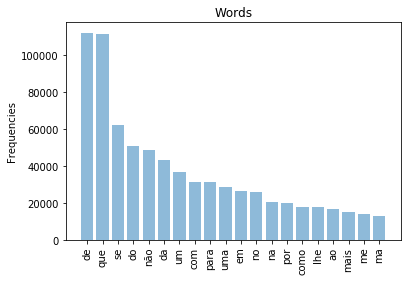

In [25]:
plot_frequencies(top_df)

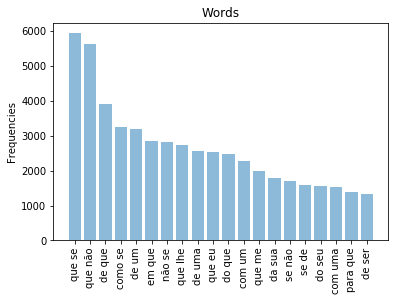

In [26]:
top_df2 = get_top_n_grams(train_df["Text"], top_k=20, n=2)
plot_frequencies(top_df2)

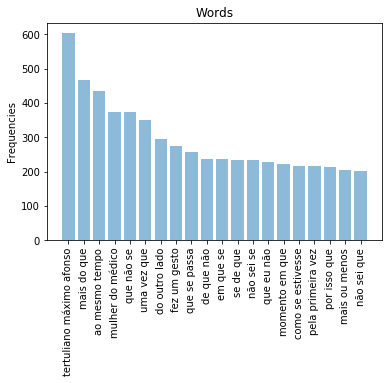

In [27]:
top_df3 = get_top_n_grams(train_df["Text"], top_k=20, n=3)
plot_frequencies(top_df3)

In [28]:
train_df1 = train_df
#train_df1

In [29]:
#Number of words per author
train_df1['Total_words'] = [len(x.split()) for x in train_df1['Text'].tolist()]
train_df1['Total_words'].head(5)

0     297
1     296
2    5894
3     629
4     559
Name: Total_words, dtype: int64

In [30]:
#Number of texts per author
train_df1['Author'].value_counts()

CamiloCasteloBranco    20
JoseSaramago           12
AlmadaNegreiros         9
LuisaMarquesSilva       9
JoseRodriguesSantos     8
EcaDeQueiros            5
Name: Author, dtype: int64

In [31]:
train_df1.groupby(["Author", "Total_words"]).size()

Author               Total_words
AlmadaNegreiros      65             1
                     296            1
                     297            1
                     559            1
                     629            1
                     2630           1
                     5894           1
                     6297           1
                     11951          1
CamiloCasteloBranco  3976           1
                     4993           1
                     5078           1
                     6191           1
                     9550           1
                     14053          1
                     17859          1
                     23289          1
                     23534          1
                     40983          1
                     43803          1
                     43806          1
                     44142          1
                     46064          1
                     47445          1
                     48733          1
                 

<hr>

<h2 style='color: #434e52'>Sampling and spliting the texts </h2>

<h3 style='color: #36A7A2'>Finding out the number of words per paragraph and text</h3>

In [32]:
train_df1['Author'].head(5)

0    AlmadaNegreiros
1    AlmadaNegreiros
2    AlmadaNegreiros
3    AlmadaNegreiros
4    AlmadaNegreiros
Name: Author, dtype: object

In [33]:
def label_race (train_df1):
    if train_df1['Author'] == 'AlmadaNegreiros' :
        return 'AN'
    elif train_df1['Author'] == 'CamiloCasteloBranco' :
        return 'CCB'
    elif train_df1['Author'] == 'EcaDeQueiros' :
        return 'EQ'
    elif train_df1['Author'] == 'JoseSaramago':
        return 'JS'
    elif train_df1['Author'] == 'JoseRodriguesSantos':
        return 'JRS'
    elif train_df1['Author']  == 'LuisaMarquesSilva':
        return 'LMS'

In [34]:

#Number of texts per author
train_df1.apply (lambda train_df1: label_race(train_df1), axis=1).value_counts()

CCB    20
JS     12
AN      9
LMS     9
JRS     8
EQ      5
dtype: int64

In [35]:

train_df1['Label'] = train_df1.apply (lambda row: label_race(row), axis=1)

In [36]:

train_df1.Label.head(5)

0    AN
1    AN
2    AN
3    AN
4    AN
Name: Label, dtype: object

In [37]:
#Separating author's texts into different dataframes 
df_train_AN = train_df1.loc[train_df1['Label'] == 'AN']
df_train_CCB = train_df1.loc[train_df1['Label'] == 'CCB']
df_train_JS = train_df1.loc[train_df1['Label'] == 'JS']
df_train_JRS = train_df1.loc[train_df1['Label'] == 'JRS']
df_train_LM = train_df1.loc[train_df1['Label'] == 'LMS']
df_train_EQ = train_df1.loc[train_df1['Label'] == 'EQ']

<h3 style='color: #36A7A2'>Extracting segments</h3>

In [38]:
def extractDigits(lst): 
    return [[el] for el in lst] 


def random_chunk(li, min_chunk=1, max_chunk=3):
    it = iter(li)
    while True:
        nxt = list(islice(it,randint(min_chunk,max_chunk)))
        if nxt:
            yield nxt
        else:
            break

<h4>Luísa Marques Silva</h4>

In [39]:
List_LM = []

for i in df_train_LM['Text'].index:
    if len(df_train_LM['Text'][i].split()) <= 1000:
        List_LM.append(df_train_LM['Text'][i])

List_LM = extractDigits(List_LM)

for i in df_train_LM['Text'].index:
    if len(df_train_LM['Text'][i].split()) > 1000:
        Text_to_chunks = df_train_LM['Text'][i].split()
    # Splitting a text into chunks
        my_chunk = random_chunk(Text_to_chunks, min_chunk=500, max_chunk=1000)
        chunks = list(my_chunk)
    # Ensuring each chunk has at least 500 words
    if len(chunks[-1]) < 500:
        chunks[-1] = chunks[-2] + chunks[-1]
        del chunks[-2]
    for c in chunks:
        List_LM.append(c)

In [40]:
##List_LM

<h4>José Saramago</h4>

In [41]:
List_JS = []

for i in df_train_JS['Text'].index:
    if len(df_train_JS['Text'][i].split()) <= 1000:
        List_JS.append(df_train_JS['Text'][i])

List_JS = extractDigits(List_JS)

for i in df_train_JS['Text'].index:
    if len(df_train_JS['Text'][i].split()) > 1000:
        Text_to_chunks = df_train_JS['Text'][i].split()
    # Splitting a text into chunks
        my_chunk = random_chunk(Text_to_chunks, min_chunk=500, max_chunk=1000)
        chunks = list(my_chunk)
    # Ensuring each chunk has at least 500 words
    if len(chunks[-1]) < 500:
        chunks[-1] = chunks[-2] + chunks[-1]
        del chunks[-2]
    for c in chunks:
        List_JS.append(c)

In [42]:
##List_JS

<h4>José Rodrigues dos Santos</h4>

In [43]:
List_JRS = []

for i in df_train_JRS['Text'].index:
    if len(df_train_JRS['Text'][i].split()) <= 1000:
        List_LRS.append(df_train_JRS['Text'][i])

List_JRS = extractDigits(List_JRS)

for i in df_train_JRS['Text'].index:
    if len(df_train_JRS['Text'][i].split()) > 1000:
        Text_to_chunks = df_train_JRS['Text'][i].split()
    # Splitting a text into chunks
        my_chunk = random_chunk(Text_to_chunks, min_chunk=500, max_chunk=1000)
        chunks = list(my_chunk)
    # Ensuring each chunk has at least 500 words
    if len(chunks[-1]) < 500:
        chunks[-1] = chunks[-2] + chunks[-1]
        del chunks[-2]
    for c in chunks:
        List_JRS.append(c)

In [44]:
#List_JRS 

<h4>Camilo Castelo Branco</h4>

In [45]:
List_CCB = []

for i in df_train_CCB['Text'].index:
    if len(df_train_CCB['Text'][i].split()) <= 1000:
        List_CCB.append(df_train_CCB['Text'][i])

List_CCB = extractDigits(List_CCB)

for i in df_train_CCB['Text'].index:
    if len(df_train_CCB['Text'][i].split()) > 1000:
        Text_to_chunks = df_train_CCB['Text'][i].split()
    # Splitting a text into chunks
        my_chunk = random_chunk(Text_to_chunks, min_chunk=500, max_chunk=1000)
        chunks = list(my_chunk)
    # Ensuring each chunk has at least 500 words
    if len(chunks[-1]) < 500:
        chunks[-1] = chunks[-2] + chunks[-1]
        del chunks[-2]
    for c in chunks:
        List_CCB.append(c)

In [46]:
#List_CCB

<h4>Almada Negreiros</h4>

In [47]:
List_AN = []

for i in df_train_AN['Text'].index:
    if len(df_train_AN['Text'][i].split()) <= 1000:
        List_AN.append(df_train_AN['Text'][i])

List_AN = extractDigits(List_AN)

for i in df_train_AN['Text'].index:
    if len(df_train_AN['Text'][i].split()) > 1000:
        Text_to_chunks = df_train_AN['Text'][i].split()
    # Splitting a text into chunks
        my_chunk = random_chunk(Text_to_chunks, min_chunk=500, max_chunk=1000)
        chunks = list(my_chunk)
    # Ensuring each chunk has at least 500 words
    if len(chunks[-1]) < 500:
        chunks[-1] = chunks[-2] + chunks[-1]
        del chunks[-2]
    for c in chunks:
        List_AN.append(c)

In [48]:
#List_AN

<h4>Eça de Queiroz</h4>

In [49]:
List_EQ = []

for i in df_train_EQ['Text'].index:
    if len(df_train_EQ['Text'][i].split()) <= 1000:
        List_EQ.append(df_train_EQ['Text'][i])

List_EQ = extractDigits(List_EQ)

for i in df_train_EQ['Text'].index:
    if len(df_train_EQ['Text'][i].split()) > 1000:
        Text_to_chunks = df_train_EQ['Text'][i].split()
    # Splitting a text into chunks
        my_chunk = random_chunk(Text_to_chunks, min_chunk=500, max_chunk=1000)
        chunks = list(my_chunk)
    # Ensuring each chunk has at least 500 words
    if len(chunks[-1]) < 500:
        chunks[-1] = chunks[-2] + chunks[-1]
        del chunks[-2]
    for c in chunks:
        List_EQ.append(c)

In [50]:
len(List_AN)
len(List_EQ)
len(List_LM)
len(List_JS)
len(List_JRS)
len(List_CCB)

874

In [51]:
df_AN = pd.DataFrame(list(zip(List_AN)))
df_AN['Label'] = "AN"
df_EQ = pd.DataFrame(list(zip(List_EQ)))
df_EQ['Label'] = "EQ"
df_LM = pd.DataFrame(list(zip(List_LM)))
df_LM['Label'] = "LM"
df_JS = pd.DataFrame(list(zip(List_JS)))
df_JS['Label'] = "JS"
df_JRS = pd.DataFrame(list(zip(List_JRS)))
df_JRS['Label'] = "JRS"
df_CCB = pd.DataFrame(list(zip(List_CCB)))
df_CCB['Label'] = "CCB"

<h3 style='color: #36A7A2'>Recleaning the new dataframes</h3>

In [52]:
# Rename columns
df_AN = df_AN.rename(columns={0: "Text"})
df_EQ = df_EQ.rename(columns={0: "Text"})
df_LM = df_LM.rename(columns={0: "Text"})
df_JS = df_JS.rename(columns={0: "Text"})
df_JRS = df_JRS.rename(columns={0: "Text"})
df_CCB = df_CCB.rename(columns={0: "Text"})


In [53]:
for i in range(len(df_AN)):
    df_AN['Text'][i] = ' '.join(df_AN['Text'][i])

for i in range(len(df_EQ)):
    df_EQ['Text'][i] = ' '.join(df_EQ['Text'][i])    
    
for i in range(len(df_LM)):
    df_LM['Text'][i] = ' '.join(df_LM['Text'][i])    

for i in range(len(df_JS)):
    df_JS['Text'][i] = ' '.join(df_JS['Text'][i]) 

for i in range(len(df_JRS)):
    df_JRS['Text'][i] = ' '.join(df_JRS['Text'][i])
    
for i in range(len(df_CCB)):
    df_CCB['Text'][i] = ' '.join(df_CCB['Text'][i])


In [54]:
df_LM.head(5)

,Text,Label
0,"a bela história de dinis e beatriz ou requiem por uma borbulha o dinis era um menino magrinho de doze ano que aparentava sete ou oito. o colegas de turma gostavam dele porque ele era assim, pequenino e frágil, e também porque era gentil com todos. especialmente a meninas, a quem dinis mal chegava ao ombro, adoravam no, porque era educado, não lhes batia como faziam o outros meninos e parecia um bebé, com o seus cabelos anelados muito escuros e o seu enormes olhos pestanudos, a sobressaírem n...",LM
1,"pormenores mais sórdidos, e saltava, e lutava, e esbracejava, e guinchava, e corria de um lado para o outro na cenas mais heróicas. foram três horas de emoção, do melhorio, a entreterem o nosso rapaz. e que bem que beatriz descrevia a personagens! dinis já a via ali à sua frente: doi rapazitos franzinos como ele, ma corajosos e orgulhosos; o horrendo duende mirro, verdadeiramente perverso e cruel; bruno, o cowboy grande e medroso, com graf problemas intestinais, que se tornara, por força da ...",LM
2,"depois, algo deprimida pela fase do crescimento do seu bebézito que se adivinhava, foi fazer o jantar. o pai tinha lhe igualmente comprado um livro sobre a puberdade. entregou lho com um ar cúmplice e disse lhe que estava marcada para breve uma conversa “de homem para homem”. dinis achou o um bocado cretinos, ma agradeceu na mesma. à noite folheou o livro da mãe, e, com a ajuda da beatriz, aprendeu imensas coisas sobre o homens e sobre a mulheres, e sobre a potencialidades do corpo humano. f...",LM
3,"do seu período de infância, não precisa de deixar de ser uma criança por isso. ma esta missão é tão difícil! na maioria do casos nem sequer somos capazes de falar com o nosso hospedeiro. ou somos logo espremidas, ou somos simplesmente ignoradas. é um desespero! − beatriz fez uma pausa, como se estivesse a ter alguma má recordação. − ma tu, tu dinis… foste um sucesso! dinis não era capaz de dizer nada. fez se um silêncio total no quarto: − já estiveste noutros meninos? − perguntou a medo. não...",LM
4,"acabou-se! ainda o henriquinho não tinha feito oito anos, e o j. cão morreu-lhe no braços. era um gato velho e o rapazinho não conseguia conceber a sua existência sem o j. cão, poi desde que nascera, e desde que se lembrava da vida, o gato estivera sempre lá: gordo, preto, riscado a branco, pachorrento e eternamente esfomeado. não percebeu o que a mãe lhe tentou explicar sobre a morte, e também não percebeu porque é que o seu amigo j. cão não se mexia, não brincava com ele e não aceitava o s...",LM


In [55]:
def double_clean(text_list):
    updates = []
    
    for j in tqdm(range(len(text_list))):
        
        text = text_list[j]
        text = re.sub("[^a-zA-Z0-9µùàçéèçÇ'\u00B5-\u00FF.,]", ' ', text)
        
        white_space = re.compile(r'\s+')
        text = white_space.sub(' ', text).strip()
        
        updates.append(text)
        
    return updates

In [56]:
#List to string
updates = double_clean(df_AN['Text'])
update_df(df_AN, updates)

updates = double_clean(df_EQ['Text'])
update_df(df_EQ, updates)

updates = double_clean(df_LM['Text'])
update_df(df_LM, updates)

updates = double_clean(df_JS['Text'])
update_df(df_JS, updates)

updates = double_clean(df_JRS['Text'])
update_df(df_JRS, updates)

updates = double_clean(df_CCB['Text'])
update_df(df_CCB, updates)



In [57]:
df_AN1 = df_AN
df_EQ1 = df_EQ
df_LM1 = df_LM
df_JS1 = df_JS
df_JRS1 = df_JRS
df_CCB1 = df_CCB

In [58]:
def drop_random(df):
    np.random.seed(1)
    remove_n = df.shape[0] - 50
    drop_indices = np.random.choice(df.index, remove_n,replace = False)
    df_subset = df.drop(drop_indices)
   
    return df_subset

In [59]:
df_AN2= drop_random(df_AN1)
df_EQ2 = drop_random(df_EQ1)
df_LM2 = drop_random(df_LM1)
df_JS2 = drop_random(df_JS1)
df_JRS2 = drop_random(df_JRS1)
df_CCB2 = drop_random(df_CCB1)

In [60]:
print(df_AN2.shape[0])
print(df_EQ2.shape[0])
print(df_LM2.shape[0])
print(df_JS2.shape[0])
print(df_JRS2.shape[0])
print(df_CCB2.shape[0])
# they all have the size based on the size of the chunks

50
50
50
50
50
50


In [61]:
df_CCB2.head(5)

,Text,Label
7,"e disse com engulho captiva isto nem com fome de cão se podium tragar que o medico me não deixava comer outra coisa, balbuciei tão extenuado e offegante que me parecia despegar se o ultimo colchete da existencia n'um esvahir de desmaio. sinto me morrer ... murmurei flebilmente. e morre decerto confirmou ella com sinistra solemnidade morre, se não mudar de comida. quer que eu o ponha rijo diga á dona da hospedaria que a sua enfermeira e cozinheira sou eu. não esperou resposta e sahiu. pouco d...",CCB
37,"possas pagar me parte da divida de teu filho, que me expirou no braços.» venceslau abraçou o commendador com enthusiasta commoção, murmurando se o offendi, perdôe me em nome de seu filho. eu não suppuz que v. s. désse tal interpretação ás minhas palavras irreflectidas. está perdoado, porque peccou involuntariamente. bem sabia eu que não ha orgulho tamanho em homem que exercitou a caridade com tantos... póde ser que o amigo intimo de meu filho despreze a honras de deputado, e acceite com vaid...",CCB
71,"propensos aos futeis recreios da assembleias. d. julia escutava estas discussões, e assentia á indulgencia do marido, sem reparar que o padre lhe estudava o pensamento na menos expressivas alterações do semblante. padre manoel digamol o de corrida não lia sómente livros latinos, nem estudára na lesbias e lydia a versatilidades femeaes. parece que o sabio, ante de vir á poesia romana, tinha sido poeta por sua conta, e risco, talvez, da dignidade sacerdotal. como vivêra trinta ou quarenta anno...",CCB
72,"fogo ao templo da velhas crenças. corruptio optimi pessima , como diz horacio. bem aventurados aquelles que circumscrevem á familia a regalia do repouso, e cerram a suas porta á ociosidade que se desenfastia a bailar, a jogar, a cacarejar frioleiras no salões. cada vez me felicito mais por vêr que v. s. vae brandamente reduzindo sua senhora ao socego da vida intima... reduzindo, não, meu amigo corrigiu venceslau. não se persuada que eu reajo aos desejos de minha mulher. n'esta casa, que é d'...",CCB
86,"livre de perigo ma como era já de doi gumes o ferro com que devia cortar lhe o fios da vida, calou se ainda. o segundo filho estava moribundo. um dia, venceslau, já convalescente, disse ao padre que lhe levasse o filhos ao campo grande, que o queria vêr. não m'os conduza aqui accrescentou elle porque ainda ha colericos n'este predio. e o padre, cahindo em joelhos, poz a mãos, e exclamou coragem, senhor que vae dizer me, padre manoel que o seus filhos... morreram estão no céo, pedindo a nosso...",CCB


In [62]:
dfs = pd.concat([df_AN2, df_EQ2, df_LM2, df_JS2, df_JRS2, df_CCB2])
df_final = dfs
df_final.head(5)

,Text,Label
1,"pierrot n'aquella noite depois de muito pensar disse que queria morrer. pierrot, coitado, tinha razão um dia inteiro sem ver pierrette não é viver deitou se muito cançado n'um jardim qualquer. havia luz no palacio e uma linda menina a fazer serão. poi logo quiz deus nosso senhor que fôsse o jardim de pierrette . pierrot não quiz acreditar ma depois ficou muito contente. procurou uma pedrinha e atirou a. pierrette ouviu, espreitou ma não viu ninguem porque pierrot tinha se escondido entre o c...",AN
3,em portugal existe uma unica opinião sobre arte e abrange uma tão colossal maioria que receio que ella impere por esmagamento. essa opinião é a do ex. mo sr. dr. josé de figueiredo gago do governo . não é porque este snr tenha opinião nem que este snr seja da igualha do resto de portugal ma o resto de portugal e este senhor em materia de opinião são da mesma igualha. um dia um senhor grisalho disse me em meia hora o seus conhecimentos sobre arte. quando acabou a meia hora descobri que o conh...,AN
7,"conscienciosamente poder dizer que era menos realista que seus avós porém, odios velhos de covardes inimigos o haviam denunciado á alçada, e o prudente sujeito ante quiz confirmar a denuncia com a fuga, que provar d'entre ferros sua innocencia. em 1833 recolheu a numerosa familia á patria. a meninas vinham esmeradamente educadas em collegio de paris, e saudosas do comêços de vida alegre que ainda experimentaram na capital do mundo. a transição de paris para a margens do lima, a noites fugiti...",AN
8,"ainda pelos ruidosos esplendores da capital. quem de lá sahiu ha dezoito annos, e hoje alli voltou, não reconheceu de certo a sociedade portuense. então primavam a principaes familias do commercio, da industria e da jerarchia na magnificencia de seus bailes. rara semana corria sem que algum salão reverberasse o seus lustre na graças nativas e no custosos artificios com que se sobre doiravam aquellas gentis meninas, que hoje se desvelam em ser mães, e todo seu viver concentram na vida intima....",AN
20,"da sociedade em que tu deves saber muito assim mesmo, se tu quizeres posso recordar te de o ter ouvido a ti e aos outros, alguns casamentos mal agourados por terem sido contra vontade da filhas, arrancadas por força a affeições de moços pobres para serem adjudicadas a homens odiados com toda a sua riqueza. pois, com o rapido andar de alguns mezes, se não dias, a esposas violentadas apparecem radiosas de alegria na suas carruagens, no seus camarotes e no seus salões em quanto o mocinhos pobre...",AN


<hr>

<h2 style='color: #434e52'>Building the model </h2>

In [63]:
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))

<h3 style='color: #36A7A2'>Extracting features with a Bag-of-words</h3>

In [64]:
stop = set(stopwords.words('portuguese'))
# cv = CountVectorizer(max_df=0.9, binary=True)
cv = CountVectorizer(
    max_df=0.8,
    stop_words=stop,
    max_features=10000, 
    ngram_range=(1,3)
)


In [65]:
X = cv.fit_transform(df_final["Text"])
y = np.array(df_final["Label"])

<h3 style='color: #36A7A2'>Stratified KFold and split</h3>

In [66]:
skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(X, y)
print(skf)
StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

StratifiedKFold(n_splits=2, random_state=None, shuffle=False)
TRAIN: [ 25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42
  43  44  45  46  47  48  49  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 275
 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293
 294 295 296 297 298 299] TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  50  51  52  53  54  55  56  57  58  59  60
  61  62  63  64  65  66  67  68  69  70  71  72  73  74 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 150 151 15

In [67]:
X_train, X_val, y_train, y_val = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=15, 
                                                    shuffle=True, 
                                                   )

In [68]:
kf = KFold(n_splits=3, )
for train_index, test_index in kf.split(X):
     print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261
 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279
 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297
 298 299] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 

In [69]:
model = KNeighborsClassifier(n_neighbors=2) #Simple One
model.fit(X_train,y_train)
labels_train = model.predict(X_train)
labels_val = model.predict(X_val)
metrics1 = metrics(y_train = y_train, pred_train = labels_train , y_val = y_val, pred_val = labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

          AN       0.70      1.00      0.82        37
         CCB       0.74      0.67      0.70        39
          EQ       0.39      0.81      0.53        36
         JRS       0.82      0.35      0.49        40
          JS       0.89      0.46      0.60        35
          LM       1.00      0.74      0.85        38

    accuracy                           0.67       225
   macro avg       0.76      0.67      0.67       225
weighted avg       0.76      0.67      0.67       225

[[37  0  0  0  0  0]
 [13 26  0  0  0  0]
 [ 0  7 29  0  0  0]
 [ 0  1 25 14  0  0]
 [ 3  1 12  3 16  0]
 [ 0  0  8  0  2 28]]
______

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

          AN       0.55      0.85      0.67        13
         CCB       0.44      0.64      0.52        11
          EQ       0.38      0.71      0.50        14
         JRS       0.00      0.00      0.00        10
          JS       0.80      0.27      0.40        15
          LM       1.00      0.67      0.80        12

    accuracy                           0.53        75
   macro avg       0.53      0.52      0.48        75
weighted avg       0.55      0.53      0.49        75

[[11  2  0  0  0  0]
 [ 4  7  0  0  0  0]
 [ 0  4 10  0  0  0]
 [ 3  2  5  0  0  0]
 [ 2  0  9  0  4  0]
 [ 0  1  2  0  1  8]]


In [70]:
X_train, X_val, y_train, y_val

(<225x10000 sparse matrix of type '<class 'numpy.int64'>'
 	with 60504 stored elements in Compressed Sparse Row format>,
 <75x10000 sparse matrix of type '<class 'numpy.int64'>'
 	with 21134 stored elements in Compressed Sparse Row format>,
 array(['JS', 'EQ', 'EQ', 'LM', 'JS', 'EQ', 'EQ', 'LM', 'LM', 'JRS', 'JS',
        'AN', 'JS', 'LM', 'CCB', 'CCB', 'JRS', 'CCB', 'JS', 'CCB', 'LM',
        'CCB', 'JRS', 'EQ', 'EQ', 'JRS', 'AN', 'CCB', 'CCB', 'LM', 'CCB',
        'EQ', 'CCB', 'JS', 'LM', 'CCB', 'JRS', 'CCB', 'AN', 'AN', 'AN',
        'CCB', 'LM', 'AN', 'AN', 'CCB', 'JRS', 'CCB', 'LM', 'EQ', 'LM',
        'LM', 'LM', 'CCB', 'AN', 'CCB', 'CCB', 'JRS', 'EQ', 'EQ', 'JS',
        'JS', 'AN', 'JRS', 'CCB', 'CCB', 'CCB', 'CCB', 'LM', 'AN', 'JS',
        'JRS', 'LM', 'JRS', 'CCB', 'JRS', 'CCB', 'JS', 'AN', 'JS', 'CCB',
        'JRS', 'LM', 'JRS', 'CCB', 'JS', 'EQ', 'LM', 'JRS', 'EQ', 'JRS',
        'JS', 'AN', 'JS', 'EQ', 'LM', 'EQ', 'LM', 'AN', 'CCB', 'AN', 'CCB',
        'CCB', 'LM', 'EQ'

<h3 style='color: #36A7A2'>KNN Classifier</h3>

In [71]:
model = KNeighborsClassifier(n_neighbors=2) #Basic One

In [72]:
print(y_train.shape)
print(X_train.shape)

(225,)
(225, 10000)


In [73]:

model.fit(X_train,y_train)
labels_train = model.predict(X_train)
labels_val = model.predict(X_val)

In [74]:
metrics1 = metrics(y_train = y_train, pred_train = labels_train , y_val = y_val, pred_val = labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

          AN       0.70      1.00      0.82        37
         CCB       0.74      0.67      0.70        39
          EQ       0.39      0.81      0.53        36
         JRS       0.82      0.35      0.49        40
          JS       0.89      0.46      0.60        35
          LM       1.00      0.74      0.85        38

    accuracy                           0.67       225
   macro avg       0.76      0.67      0.67       225
weighted avg       0.76      0.67      0.67       225

[[37  0  0  0  0  0]
 [13 26  0  0  0  0]
 [ 0  7 29  0  0  0]
 [ 0  1 25 14  0  0]
 [ 3  1 12  3 16  0]
 [ 0  0  8  0  2 28]]
______

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

          AN       0.55      0.85      0.67        13
         CCB       0.44      0.64      0.52        11
          EQ       0.38      0.71      0.50        14
         JRS       0.00      0.00      0.00        10
          JS       0.80      0.27      0.40        15
          LM       1.00      0.67      0.80        12

    accuracy                           0.53        75
   macro avg       0.53      0.52      0.48        75
weighted avg       0.55      0.53      0.49        75

[[11  2  0  0  0  0]
 [ 4  7  0  0  0  0]
 [ 0  4 10  0  0  0]
 [ 3  2  5  0  0  0]
 [ 2  0  9  0  4  0]
 [ 0  1  2  0  1  8]]


In [75]:
## New KNN
model.new2 = KNeighborsClassifier(#n_neighbors=4, leaf_size = 20,
                                 weights = 'distance',
                                 p = 2,
                                 metric = 'cosine',
                                 metric_params = None,
                                 algorithm = 'brute',
                                 n_jobs = 1
                                )

nn = list(range(1,10))
ls = list(range(1,15))
h = dict(n_neighborsneighbors=nn, leaf_size = ls)

grid1 = GridSearchCV(model.new2, h)
#grid1.fit(X,y)

In [76]:
print('n_neighbors:', grid1.estimator.get_params()['n_neighbors'])
print('leaf_size:', grid1.estimator.get_params()['leaf_size']) 

n_neighbors: 5
leaf_size: 30


In [77]:
final_model = KNeighborsClassifier(n_neighbors=2, leaf_size = 30,
                                 weights = 'distance',
                                 p = 2,
                                 metric = 'cosine',
                                 metric_params = None,
                                 algorithm = 'brute'
                                )

final_model.fit(X_train, y_train)

label_train = final_model.predict(X_train)
labels_val = final_model.predict(X_val)


In [78]:
metrics2 = metrics(y_train = y_train, pred_train = labels_train , y_val = y_val, pred_val = labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

          AN       0.70      1.00      0.82        37
         CCB       0.74      0.67      0.70        39
          EQ       0.39      0.81      0.53        36
         JRS       0.82      0.35      0.49        40
          JS       0.89      0.46      0.60        35
          LM       1.00      0.74      0.85        38

    accuracy                           0.67       225
   macro avg       0.76      0.67      0.67       225
weighted avg       0.76      0.67      0.67       225

[[37  0  0  0  0  0]
 [13 26  0  0  0  0]
 [ 0  7 29  0  0  0]
 [ 0  1 25 14  0  0]
 [ 3  1 12  3 16  0]
 [ 0  0  8  0  2 28]]
______

Now that we have applied the KNN many times in many combinations, let's see if the Naive bayes is better.

<h3 style='color: #36A7A2'>Naive Bayes</h3>

In [79]:
X_train, X_val, y_train, y_val

(<225x10000 sparse matrix of type '<class 'numpy.int64'>'
 	with 60504 stored elements in Compressed Sparse Row format>,
 <75x10000 sparse matrix of type '<class 'numpy.int64'>'
 	with 21134 stored elements in Compressed Sparse Row format>,
 array(['JS', 'EQ', 'EQ', 'LM', 'JS', 'EQ', 'EQ', 'LM', 'LM', 'JRS', 'JS',
        'AN', 'JS', 'LM', 'CCB', 'CCB', 'JRS', 'CCB', 'JS', 'CCB', 'LM',
        'CCB', 'JRS', 'EQ', 'EQ', 'JRS', 'AN', 'CCB', 'CCB', 'LM', 'CCB',
        'EQ', 'CCB', 'JS', 'LM', 'CCB', 'JRS', 'CCB', 'AN', 'AN', 'AN',
        'CCB', 'LM', 'AN', 'AN', 'CCB', 'JRS', 'CCB', 'LM', 'EQ', 'LM',
        'LM', 'LM', 'CCB', 'AN', 'CCB', 'CCB', 'JRS', 'EQ', 'EQ', 'JS',
        'JS', 'AN', 'JRS', 'CCB', 'CCB', 'CCB', 'CCB', 'LM', 'AN', 'JS',
        'JRS', 'LM', 'JRS', 'CCB', 'JRS', 'CCB', 'JS', 'AN', 'JS', 'CCB',
        'JRS', 'LM', 'JRS', 'CCB', 'JS', 'EQ', 'LM', 'JRS', 'EQ', 'JRS',
        'JS', 'AN', 'JS', 'EQ', 'LM', 'EQ', 'LM', 'AN', 'CCB', 'AN', 'CCB',
        'CCB', 'LM', 'EQ'

In [80]:
clf = GaussianNB()
clf
clf.fit(X_train.toarray(), y_train)
#print(clf.predict(["JS","AN","LM", "EQ", "CCB", "JRS"]))

GaussianNB(priors=None, var_smoothing=1e-09)

<h2 style='color: #434e52'>Working with the test set </h2>

<h3 style='color: #36A7A2'>Importing the test set</h3>

In [81]:
real_df = pd.DataFrame(columns=['Text'])
real_df2 = pd.DataFrame(columns=['Text'])

In [82]:
real_df
real_df2

,Text


In [83]:
for author in author_list:
    go_to = './Corpora/test/500Palavras/'
    for filename in os.listdir(go_to):
        open_filename = go_to+"/"+filename
        f = open(open_filename, "r", encoding="utf-8")
        real_df2 = real_df2.append({'Text': f.read()}, ignore_index=True)
        f.close()

In [84]:
for author in author_list:
    go_to = './Corpora/test/1000Palavras/'
    for filename in os.listdir(go_to):
        open_filename = go_to+"/"+filename
        f = open(open_filename, "r", encoding="utf-8")
        real_df = real_df.append({'Text': f.read()}, ignore_index=True)
        f.close()

In [85]:
real_df = real_df.loc[:5,:]
real_df 
real_df2 = real_df2.loc[:5,:]
real_df2 

,Text
0,"Depois, pouco a pouco, a tranquilidade regressa, agora Lídia volta-se para Ricardo Reis e ele para ela, o braço de um sobre o corpo do outro, ele torna a dizer, Não foi nada, e ela sorri, mas a expressão do olhar tem outro sentido, vê-se bem que não está a pensar no abalo de terra, ficam assim a olhar-se tão distantes um do outro, tão separados nos seus pensamentos, como logo se vai ver quando ela disser, de repente Acho que estou grávida, tenho um atraso de dez dias. Um médico aprende na fa..."
1,"Justamente como se eu tivesse tido a ideia de fazer uma cabeça de Christo e não um Christo inteiro. Não me dirá o senhbr Barbosa o que terá percebido do meu Christo? Julgou que fôsse partida aos catholicos? Julgou que era a minha adhesão á Republica? Julgarão tambem os catholicos que me merece alguma consideração essa sua archaica restricção religiosa? Julgarão acaso os catholicos que eu pretendi cantar-lhes a devoção? Julgarão os monarchicos tambem alguma coisa em seu favor?\n\nChristo, cuj..."
2,"Quase um mês depois, a época de exames aproximava-se vertiginosamente e acabavam se os últimos projectos. Estavam todos estoirados. A peruca e os óculos escuros não tinham levado a polícia a nenhum suspeito. Apenas uma coisa ficara clara para os quatro amigos: alguém tentara incriminar Topo ao esconder a peruca e os óculos num sítio onde seriam descobertos mais cedo ou mais tarde. A grande questão era: porquê Topo?\nOutra coisa que lhes dava a volta à cabeça nos escassos momentos em que não ..."
3,"Agora, porém, era sem fervor, arrastadamente, que elle me levava ao Bosque, onde eu, aproveitando a clemencia d'Abril, tentava enganar a minha saudade d'arvoredos. Emquanto subiamos, ao trote nobre das suas egoas lustrosas, a Avenida dos Campos-Elyseos e a do Bosque, rejuvenescidas pelas relvas tenras e fresco verdejar dos rebentos, Jacintho, soprando o fumo da cigarrete pelas vidraças abertas do coupé, permanecia o bom camarada, de veia amavel, com quem era doce philosophar através de Paris..."
4,"O cahos de cima a descer, a descer com a mortalha de treva sobre o abysmo que subia, subia n'uma ressonancia de maldições ao FIAT, creador das sevas angustias ineluctaveis do homem. E o naufrago cravava olhos piedosos no céo; e via listrarem-se as centelhas dos raios, como se os Titans revolucionados arrojassem á cara de Jupiter as escumalhas igneas das suas forjas. E o barão de Forrester, ao portaló, hirto, impavido como Nelson no Trafalgar.., etc._ Tudo isto e o resto me sahiu ao pintar, e..."
5,"""O Senhor ensina pela pena o que o homem não sabe. Ou seja, Alá fala directamente aos crentes através do Alcorão."" Passou mais uma vez a mão pela capa ricamente trabalhada do livro. ""Quando Maomé voltou para casa, em Meca, sentia-se confuso, mas acabou por perceber que Alá o havia escolhido como Seu mensageiro. Seguiram-se novas revelações, que trouxeram a essência do islamismo. O Profeta explicou-as à mulher, Cadija, que de imediato as aceitou, tornando-se a primeira muçulmana. Depois expli..."


<h3 style='color: #36A7A2'>Cleaning the test set <h3>

In [86]:
updates = clean(real_df["Text"], lemmatize = True, stemmer = False)
update_df(real_df, updates)
real_df
updates2 = clean(real_df2["Text"], lemmatize = True, stemmer = False)
update_df(real_df2, updates2)
real_df2

,Text
0,"depois, pouco a pouco, a tranquilidade regressa, agora lídia volta-se para ricardo real e ele para ela, o braço de um sobre o corpo do outro, ele torna a dizer, não foi nada, e ela sorri, ma a expressão do olhar tem outro sentido, vê-se bem que não está a pensar no abalo de terra, ficam assim a olhar-se tão distantes um do outro, tão separados no seus pensamentos, como logo se vai ver quando ela disser, de repente acho que estou grávida, tenho um atraso de dez dias. um médico aprende na facu..."
1,"justamente como se eu tivesse tido a ideia de fazer uma cabeça de christo e não um christo inteiro. não me dirá o senhbr barbosa o que terá percebido do meu christo? julgou que fôsse partida aos catholicos? julgou que era a minha adhesão á republica? julgarão tambem o catholicos que me merece alguma consideração essa sua archaica restricção religiosa? julgarão acaso o catholicos que eu pretendi cantar-lhes a devoção? julgarão o monarchicos tambem alguma coisa em seu favor? christo, cuja unic..."
2,"quase um mês depois, a época de exames aproximava-se vertiginosamente e acabavam se o últimos projectos. estavam todos estoirados. a peruca e o óculos escuros não tinham levado a polícia a nenhum suspeito. apenas uma coisa ficara clara para o quatro amigos: alguém tentara incriminar topo ao esconder a peruca e o óculos num sítio onde seriam descobertos mais cedo ou mais tarde. a grande questão era: porquê topo? outra coisa que lhes dava a volta à cabeça no escassos momentos em que não estava..."
3,"agora, porém, era sem fervor, arrastadamente, que elle me levava ao bosque, onde eu, aproveitando a clemencia d'abril, tentava enganar a minha saudade d'arvoredos. emquanto subiamos, ao trote nobre da suas egoas lustrosas, a avenida do campos-elyseos e a do bosque, rejuvenescidas pelas relvas tenras e fresco verdejar do rebentos, jacintho, soprando o fumo da cigarrete pelas vidraças abertas do coupé, permanecia o bom camarada, de veia amavel, com quem era doce philosophar através de paris. m..."
4,"o cahos de cima a descer, a descer com a mortalha de treva sobre o abysmo que subia, subia n'uma ressonancia de maldições ao fiat, creador da sevas angustias ineluctaveis do homem. e o naufrago cravava olhos piedosos no céo; e via listrarem-se a centelhas do raios, como se o titan revolucionados arrojassem á cara de jupiter a escumalhas igneas da suas forjas. e o barão de forrester, ao portaló, hirto, impavido como nelson no trafalgar.., etc._ tudo isto e o resto me sahiu ao pintar, e exacto..."
5,"""o senhor ensina pela pena o que o homem não sabe. ou seja, alá fala directamente aos crentes através do alcorão."" passou mais uma vez a mão pela capa ricamente trabalhada do livro. ""quando maomé voltou para casa, em meca, sentia-se confuso, ma acabou por perceber que alá o havia escolhido como seu mensageiro. seguiram-se nova revelações, que trouxeram a essência do islamismo. o profeta explicou-as à mulher, cadija, que de imediato a aceitou, tornando-se a primeira muçulmana. depois explicou..."


In [87]:
real_df["Text"].shape

(6,)

In [88]:
real_df2["Text"].shape

(6,)

In [89]:
stop = set(stopwords.words('portuguese'))

cv = CountVectorizer(
    max_df=0.3,
    stop_words=stop,
    max_features=10000, 
    ngram_range=(1,3)
)
X = cv.fit_transform(real_df["Text"])

In [90]:
X.shape

(6, 8589)

In [91]:
y_lab1 = np.array(["JS","AN","LM", "EQ", "CCB", "JRS"])
print(y_lab1)
print(y_train)

['JS' 'AN' 'LM' 'EQ' 'CCB' 'JRS']
['JS' 'EQ' 'EQ' 'LM' 'JS' 'EQ' 'EQ' 'LM' 'LM' 'JRS' 'JS' 'AN' 'JS' 'LM'
 'CCB' 'CCB' 'JRS' 'CCB' 'JS' 'CCB' 'LM' 'CCB' 'JRS' 'EQ' 'EQ' 'JRS' 'AN'
 'CCB' 'CCB' 'LM' 'CCB' 'EQ' 'CCB' 'JS' 'LM' 'CCB' 'JRS' 'CCB' 'AN' 'AN'
 'AN' 'CCB' 'LM' 'AN' 'AN' 'CCB' 'JRS' 'CCB' 'LM' 'EQ' 'LM' 'LM' 'LM'
 'CCB' 'AN' 'CCB' 'CCB' 'JRS' 'EQ' 'EQ' 'JS' 'JS' 'AN' 'JRS' 'CCB' 'CCB'
 'CCB' 'CCB' 'LM' 'AN' 'JS' 'JRS' 'LM' 'JRS' 'CCB' 'JRS' 'CCB' 'JS' 'AN'
 'JS' 'CCB' 'JRS' 'LM' 'JRS' 'CCB' 'JS' 'EQ' 'LM' 'JRS' 'EQ' 'JRS' 'JS'
 'AN' 'JS' 'EQ' 'LM' 'EQ' 'LM' 'AN' 'CCB' 'AN' 'CCB' 'CCB' 'LM' 'EQ' 'AN'
 'LM' 'CCB' 'LM' 'JRS' 'LM' 'LM' 'AN' 'JS' 'JS' 'EQ' 'EQ' 'CCB' 'JRS' 'EQ'
 'EQ' 'JS' 'AN' 'JRS' 'LM' 'EQ' 'LM' 'JRS' 'AN' 'JRS' 'AN' 'JS' 'EQ' 'JRS'
 'LM' 'JRS' 'JRS' 'LM' 'LM' 'JS' 'JRS' 'JS' 'LM' 'JRS' 'JS' 'CCB' 'JRS'
 'EQ' 'AN' 'AN' 'JS' 'AN' 'JS' 'CCB' 'LM' 'EQ' 'JS' 'JS' 'EQ' 'JRS' 'LM'
 'JS' 'EQ' 'AN' 'AN' 'EQ' 'LM' 'JS' 'JRS' 'CCB' 'AN' 'JRS' 'EQ' 'AN' 'EQ'
 'JRS' 'CCB' 'JS

<h3 style='color: #36A7A2'>TF-IDF</h3>

In [92]:
tfidf_vectorizer = TfidfTransformer()
tfidf_vectorizer.fit(X)
#Get feature names
feature_names = cv.get_feature_names()
 
#Fetch document for which keywords needs to be extracted
doc = train_df1['Text'][2]
 
#Generate tf-idf for the given document
tf_idf_vector = tfidf_vectorizer.transform(cv.transform([doc]))

tf_idf_vector.toarray()

def extract_feature_scores(feature_names, document_vector):
    """
    Function that creates a dictionary with the TF-IDF score for each feature.
    :param feature_names: list with all the feature words.
    :param document_vector: vector containing the extracted features for a specific document
    
    :return: returns a sorted dictionary "feature":"score".
    """
    feature2score = {}
    for i in range(len(feature_names)):
        feature2score[feature_names[i]] = document_vector[0][i]    
    return sorted(feature2score.items(), key=lambda kv: kv[1], reverse=True)

extract_feature_scores(feature_names, tf_idf_vector.toarray())

tf_idf_vector = tfidf_vectorizer.transform(cv.transform([doc]))

tf_idf_vector 


<1x8589 sparse matrix of type '<class 'numpy.float64'>'
	with 266 stored elements in Compressed Sparse Row format>

In [93]:
final_model.fit(X, y_lab1)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='cosine',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='distance')

In [94]:
labels_real500 = final_model.predict(X)
labels_real500

array(['JS', 'AN', 'LM', 'EQ', 'CCB', 'JRS'], dtype='<U3')

In [95]:
labels_real1000 = final_model.predict(X)
labels_real1000

array(['JS', 'AN', 'LM', 'EQ', 'CCB', 'JRS'], dtype='<U3')

<h2 style='color: #434e52'>Double testing and experimenting with other types of approaches. </h2>


In [97]:
tfidf_vectorizer = TfidfTransformer()
tfidf_vectorizer.fit(X)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [98]:
# get feature names
feature_names = cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc = train_df1['Text'][2]
 
#generate tf-idf for the given document
tf_idf_vector = tfidf_vectorizer.transform(cv.transform([doc]))

In [99]:
tf_idf_vector.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [100]:
def extract_feature_scores(feature_names, document_vector):
    """
    Function that creates a dictionary with the TF-IDF score for each feature.
    :param feature_names: list with all the feature words.
    :param document_vector: vector containing the extracted features for a specific document
    
    :return: returns a sorted dictionary "feature":"score".
    """
    feature2score = {}
    for i in range(len(feature_names)):
        feature2score[feature_names[i]] = document_vector[0][i]    
    return sorted(feature2score.items(), key=lambda kv: kv[1], reverse=True)

In [101]:
extract_feature_scores(feature_names, tf_idf_vector.toarray())

[('mãe', 0.48115616385877524),
 ('palavras', 0.4276943678744669),
 ('humanidade', 0.24057808192938762),
 ('mestre', 0.21384718393723345),
 ('verdade', 0.20048173494115637),
 ('terra', 0.18711628594507926),
 ('duas grandes', 0.147019938956848),
 ('grandes', 0.147019938956848),
 ('metade', 0.147019938956848),
 ('lado', 0.1336544899607709),
 ('pessoas', 0.1336544899607709),
 ('linhas', 0.12028904096469381),
 ('causa', 0.09355814297253963),
 ('ganhar', 0.09355814297253963),
 ('homens', 0.09355814297253963),
 ('peito', 0.09355814297253963),
 ('ar', 0.08019269397646255),
 ('contar', 0.08019269397646255),
 ('ir', 0.08019269397646255),
 ('maneira', 0.08019269397646255),
 ('multidão', 0.08019269397646255),
 ('palavra', 0.08019269397646255),
 ('paris', 0.08019269397646255),
 ('parte', 0.08019269397646255),
 ('passa', 0.08019269397646255),
 ('pessôas', 0.08019269397646255),
 ('sei', 0.08019269397646255),
 ('viagem', 0.08019269397646255),
 ('anjo', 0.06682724498038545),
 ('aquelle', 0.066827244980

In [102]:
tf_idf_vector = tfidf_vectorizer.transform(cv.transform([doc]))

In [103]:
tf_idf_vector 

<1x8589 sparse matrix of type '<class 'numpy.float64'>'
	with 266 stored elements in Compressed Sparse Row format>

In [104]:
tfidf_vectorizer = TfidfTransformer()
tfidf_vectorizer.fit(X)
# get feature names
feature_names = cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc = train_df1['Text'][2]
 
#generate tf-idf for the given document
tf_idf_vector = tfidf_vectorizer.transform(cv.transform([doc]))

tf_idf_vector.toarray()

def extract_feature_scores(feature_names, document_vector):
    """
    Function that creates a dictionary with the TF-IDF score for each feature.
    :param feature_names: list with all the feature words.
    :param document_vector: vector containing the extracted features for a specific document
    
    :return: returns a sorted dictionary "feature":"score".
    """
    feature2score = {}
    for i in range(len(feature_names)):
        feature2score[feature_names[i]] = document_vector[0][i]    
    return sorted(feature2score.items(), key=lambda kv: kv[1], reverse=True)

extract_feature_scores(feature_names, tf_idf_vector.toarray())

tf_idf_vector = tfidf_vectorizer.transform(cv.transform([doc]))

tf_idf_vector 

<1x8589 sparse matrix of type '<class 'numpy.float64'>'
	with 266 stored elements in Compressed Sparse Row format>

<h3 style='color: #36A7A2'>Linear Classifiers</h3>

In [105]:
# categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
# twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

In [106]:
train_df1.head(1)

,Author,Text,Total_words,Label
0,AlmadaNegreiros,"satanizo-me tara na vara de moysés! o castigo da serpentes é-me riso no dentes, inferno a arder o meu cantar! sou vermelho-niagára do sexos escancarados no chicotes do cossacos! sou pan-demonio-trifauce enfermiço de gula! sou genio de zarathustra em taças de maré-alta! sou raiva de medusa e damnação do sol! ladram-me a vida por vivê-la e só me deram uma! hão-de lati-la por sina! agora quero vivê-la! hei-de poeta cantá-la em gala sonora e dina! hei-de gloria desannuviá-la! hei-de guindaste iç...",297,AN


In [107]:
vectorizer = TfidfVectorizer(stop_words="english", max_df=0.8)
X = vectorizer.fit_transform(train_df1.Text).toarray()
Y = train_df1.Author
X.shape, Y.shape

((63, 107407), (63,))

In [108]:
class Classifier(object):
    """ Multi Class Classifier base class """

    def __init__(self, input_size, n_classes):
        """
        Initializes a matrix in which each column will be the Weights for a specific class.
        :param input_size: Number of features
        :param n_classes: Number of classes to classify the inputs
        """
        self.parameters = np.zeros((input_size+1, n_classes)) # input_size +1 to include the Bias term

    def train(self, X, Y, devX, devY, epochs=20):
        """
        This trains the perceptron over a certain number of epoch and records the
            accuracy in Train and Dev sets along each epoch.
        :param X: numpy array with size DxN where D is the number of training examples
                 and N is the number of features.
        :param Y: numpy array with size D containing the correct labels for the training set
        :param devX (optional): same as X but for the dev set.
        :param devY (optional): same as Y but for the dev set.
        :param epochs (optional): number of epochs to run.
        """
        train_accuracy = [self.evaluate(X, Y)]
        dev_accuracy = [self.evaluate(devX, devY)]
        for epoch in range(epochs):
            for i in tqdm(range(X.shape[0])):
                self.update_weights(X[i, :], Y[i])
            train_accuracy.append(self.evaluate(X, Y))
            dev_accuracy.append(self.evaluate(devX, devY))
        return train_accuracy, dev_accuracy
        

    def evaluate(self, X, Y):
        """
        Evaluates the error in a given set of examples.
        :param X: numpy array with size DxN where D is the number of examples to 
                    evaluate and N is the number of features.
        :param Y: numpy array with size D containing the correct labels for the training set
        """
        correct_predictions = 0
        for i in range(X.shape[0]):
            y_pred = self.predict(X[i, :])
            if Y[i] == y_pred:
                correct_predictions += 1
        return correct_predictions/X.shape[0]


    def plot_train(self, train_accuracy, dev_accuracy):
        """
        Function to Plot the accuracy of the Training set and Dev set per epoch.
        :param train_accuracy: list containing the accuracies of the train set.
        :param dev_accuracy: list containing the accuracies of the dev set.
        """
        x_axis = [epoch+1 for epoch in range(len(train_accuracy))]
        plt.plot(x_axis, train_accuracy, '-g', linewidth=1, label='Train')
        plt.xlabel("epochs")
        plt.ylabel("Accuracy")
        plt.plot(x_axis, dev_accuracy, 'b-', linewidth=1, label='Dev')
        plt.legend()
        plt.show()


    def update_weights(self, x, y):
        """
        Function that will take an input example and the true prediction and will 
            update the model parameters.
        
        :param x: Array of size N where N its the number of features that the model 
                  takes as input.
        :param y: The int corresponding to the correct label.
        
        child classes must implement this function
        """
        pass

    def predict(self, x):
        """
        This function will add a Bias value to the received input, multiply the Weights 
            corresponding to the different classeswith the input vector and choose the 
            class that maximizes that multiplication.
        
        :param x: numpy array with size 1xN where N = number of features.
        
        child classes must implement this function
        """
        pass

<h3 style='color: #36A7A2'>Logistic Regression</h3>

In [109]:
class MultinomialLR(Classifier):
    """ Multinomial Logistic Regression """

    def __init__(self, input_size, n_classes, lr=0.001):
        """
        Initializes a matrix in which each column will be the Weights for a specific class.
        :param input_size: Number of features
        :param n_classes: Number of classes to classify the inputs
        """
        Classifier.__init__(self, input_size, n_classes)
        self.lr = lr

    def predict(self, input):
        """
        This function will add a Bias value to the received input, multiply the 
            Weights corresponding to the different classeswith the input vector, run 
            a softmax function and choose the class that achieves an higher probability.
        :param x: numpy array with size 1xN where N = number of features.
        """
        return np.argmax(self.softmax(np.dot(np.append(input, [1]), self.parameters)))

    def softmax(self, x):
        """ Compute softmax values for each sets of scores in x."""
        return np.exp(x-np.max(x))/np.sum(np.exp(x-np.max(x)), axis=0)

    def update_weights(self, x, y):
        """
        Function that will take an input example and the true prediction and will update
            the model parameters.
        :param x: Array of size N where N its the number of features that the model takes as input.
        :param y: The int corresponding to the correct label.
        """
        linear = np.dot(np.append(x, [1]), self.parameters)
        predictions = self.softmax(linear)
        self.parameters = self.parameters - self.lr*(np.outer(predictions, np.append(x, [1])).T)
        self.parameters[:, y] = self.parameters[:, y] + self.lr*np.append(x, [1])

In [110]:
lr  = MultinomialLR(X.shape[1], len(np.unique(Y)))

In [111]:
lr.parameters.shape

(107408, 6)

In [112]:
# Before training we will have to load the a test set to validate if our accuracy improves over epoch.
X_test = vectorizer.transform(train_df1.Text).toarray()
Y_test = train_df1.Author
X_test.shape, Y_test.shape


((63, 107407), (63,))

In [113]:
#Fix it

# train_acc, dev_acc = lr.train(X, Y, devX=X_test, devY=Y_test, epochs=1)
# lr.plot_train(train_acc, dev_acc)

<h2 style='color: #434e52'>Rosenblatt Perceptron </h2>

In [114]:
class MultiClassPerceptron(Classifier):
    """ Multi Class Perceptron """

    def __init__(self, input_size, n_classes):
        """
        Initializes a matrix in which each column will be the Weights for a specific class.
        :param input_size: Number of features
        :param n_classes: Number of classes to classify the inputs
        """
        Classifier.__init__(self, input_size, n_classes)

    def predict(self, x):
        return np.argmax(np.dot(np.append(x, [1]), self.parameters))

    def update_weights(self, x, y):
        y_pred = self.predict(x)
        if y != y_pred:
            self.parameters[:, y] += np.append(x, [1])
            self.parameters[:, y_pred] -=  np.append(x, [1])
        

In [115]:
perceptron = MultiClassPerceptron(X.shape[1], len(np.unique(Y)))
perceptron.parameters.shape

(107408, 6)

In [116]:
## Fix it

# train_acc, dev_acc = perceptron.train(X, Y, devX=X_test, devY=Y_test, epochs=5)
# perceptron.plot_train(train_acc, dev_acc)

<h3 style='color: #36A7A2'>Skip-Gram model</h3>

In [117]:
conda install -c pytorch pytorch 

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - pytorch


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cudatoolkit-10.1.243       |       h74a9793_0       300.3 MB
    ninja-1.9.0                |   py37h74a9793_0         238 KB
    pytorch-1.4.0              |py3.7_cuda101_cudnn7_0       472.8 MB  pytorch
    ------------------------------------------------------------
                                           Total:       773.4 MB

The following NEW packages will be INSTALLED:

  cudatoolkit        pkgs/main/win-64::cudatoolkit-10.1.243-h74a9793_0
  ninja              pkgs/main/win-64::ninja-1.9.0-py37h74a9793_0
  pytorch            pytorch/win-64::pytorch-1.4.0-py3.7_cuda101_cudnn7_0

The following packages will be UPDATED:

  certifi                                 2019.11.28-py37_1 --> 

pytorch-1.4.0        | 472.8 MB  | ###1       |  32% 
pytorch-1.4.0        | 472.8 MB  | ###2       |  32% 
pytorch-1.4.0        | 472.8 MB  | ###2       |  32% 
pytorch-1.4.0        | 472.8 MB  | ###2       |  32% 
pytorch-1.4.0        | 472.8 MB  | ###2       |  32% 
pytorch-1.4.0        | 472.8 MB  | ###2       |  33% 
pytorch-1.4.0        | 472.8 MB  | ###2       |  33% 
pytorch-1.4.0        | 472.8 MB  | ###2       |  33% 
pytorch-1.4.0        | 472.8 MB  | ###2       |  33% 
pytorch-1.4.0        | 472.8 MB  | ###3       |  33% 
pytorch-1.4.0        | 472.8 MB  | ###3       |  33% 
pytorch-1.4.0        | 472.8 MB  | ###3       |  33% 
pytorch-1.4.0        | 472.8 MB  | ###3       |  33% 
pytorch-1.4.0        | 472.8 MB  | ###3       |  34% 
pytorch-1.4.0        | 472.8 MB  | ###3       |  34% 
pytorch-1.4.0        | 472.8 MB  | ###3       |  34% 
pytorch-1.4.0        | 472.8 MB  | ###3       |  34% 
pytorch-1.4.0        | 472.8 MB  | ###4       |  34% 
pytorch-1.4.0        | 472.8

pytorch-1.4.0        | 472.8 MB  | ######6    |  66% 
pytorch-1.4.0        | 472.8 MB  | ######6    |  66% 
pytorch-1.4.0        | 472.8 MB  | ######6    |  66% 
pytorch-1.4.0        | 472.8 MB  | ######6    |  67% 
pytorch-1.4.0        | 472.8 MB  | ######6    |  67% 
pytorch-1.4.0        | 472.8 MB  | ######6    |  67% 
pytorch-1.4.0        | 472.8 MB  | ######6    |  67% 
pytorch-1.4.0        | 472.8 MB  | ######7    |  67% 
pytorch-1.4.0        | 472.8 MB  | ######7    |  67% 
pytorch-1.4.0        | 472.8 MB  | ######7    |  67% 
pytorch-1.4.0        | 472.8 MB  | ######7    |  67% 
pytorch-1.4.0        | 472.8 MB  | ######7    |  67% 
pytorch-1.4.0        | 472.8 MB  | ######7    |  68% 
pytorch-1.4.0        | 472.8 MB  | ######7    |  68% 
pytorch-1.4.0        | 472.8 MB  | ######7    |  68% 
pytorch-1.4.0        | 472.8 MB  | ######7    |  68% 
pytorch-1.4.0        | 472.8 MB  | ######8    |  68% 
pytorch-1.4.0        | 472.8 MB  | ######8    |  68% 
pytorch-1.4.0        | 472.8

pytorch-1.4.0        | 472.8 MB  | #########6 |  96% 
pytorch-1.4.0        | 472.8 MB  | #########6 |  96% 
pytorch-1.4.0        | 472.8 MB  | #########6 |  96% 
pytorch-1.4.0        | 472.8 MB  | #########6 |  96% 
pytorch-1.4.0        | 472.8 MB  | #########6 |  96% 
pytorch-1.4.0        | 472.8 MB  | #########6 |  96% 
pytorch-1.4.0        | 472.8 MB  | #########6 |  96% 
pytorch-1.4.0        | 472.8 MB  | #########6 |  96% 
pytorch-1.4.0        | 472.8 MB  | #########6 |  97% 
pytorch-1.4.0        | 472.8 MB  | #########6 |  97% 
pytorch-1.4.0        | 472.8 MB  | #########6 |  97% 
pytorch-1.4.0        | 472.8 MB  | #########6 |  97% 
pytorch-1.4.0        | 472.8 MB  | #########6 |  97% 
pytorch-1.4.0        | 472.8 MB  | #########6 |  97% 
pytorch-1.4.0        | 472.8 MB  | #########6 |  97% 
pytorch-1.4.0        | 472.8 MB  | #########6 |  97% 
pytorch-1.4.0        | 472.8 MB  | #########7 |  97% 
pytorch-1.4.0        | 472.8 MB  | #########7 |  97% 
pytorch-1.4.0        | 472.8

cudatoolkit-10.1.243 | 300.3 MB  | ###7       |  37% 
cudatoolkit-10.1.243 | 300.3 MB  | ###7       |  38% 
cudatoolkit-10.1.243 | 300.3 MB  | ###7       |  38% 
cudatoolkit-10.1.243 | 300.3 MB  | ###7       |  38% 
cudatoolkit-10.1.243 | 300.3 MB  | ###7       |  38% 
cudatoolkit-10.1.243 | 300.3 MB  | ###7       |  38% 
cudatoolkit-10.1.243 | 300.3 MB  | ###7       |  38% 
cudatoolkit-10.1.243 | 300.3 MB  | ###7       |  38% 
cudatoolkit-10.1.243 | 300.3 MB  | ###8       |  38% 
cudatoolkit-10.1.243 | 300.3 MB  | ###8       |  38% 
cudatoolkit-10.1.243 | 300.3 MB  | ###8       |  38% 
cudatoolkit-10.1.243 | 300.3 MB  | ###8       |  38% 
cudatoolkit-10.1.243 | 300.3 MB  | ###8       |  38% 
cudatoolkit-10.1.243 | 300.3 MB  | ###8       |  38% 
cudatoolkit-10.1.243 | 300.3 MB  | ###8       |  38% 
cudatoolkit-10.1.243 | 300.3 MB  | ###8       |  39% 
cudatoolkit-10.1.243 | 300.3 MB  | ###8       |  39% 
cudatoolkit-10.1.243 | 300.3 MB  | ###8       |  39% 
cudatoolkit-10.1.243 | 300.3

cudatoolkit-10.1.243 | 300.3 MB  | #######9   |  79% 
cudatoolkit-10.1.243 | 300.3 MB  | #######9   |  79% 
cudatoolkit-10.1.243 | 300.3 MB  | #######9   |  80% 
cudatoolkit-10.1.243 | 300.3 MB  | #######9   |  80% 
cudatoolkit-10.1.243 | 300.3 MB  | ########   |  80% 
cudatoolkit-10.1.243 | 300.3 MB  | ########   |  80% 
cudatoolkit-10.1.243 | 300.3 MB  | ########   |  80% 
cudatoolkit-10.1.243 | 300.3 MB  | ########   |  81% 
cudatoolkit-10.1.243 | 300.3 MB  | ########   |  81% 
cudatoolkit-10.1.243 | 300.3 MB  | ########   |  81% 
cudatoolkit-10.1.243 | 300.3 MB  | ########1  |  81% 
cudatoolkit-10.1.243 | 300.3 MB  | ########1  |  81% 
cudatoolkit-10.1.243 | 300.3 MB  | ########1  |  82% 
cudatoolkit-10.1.243 | 300.3 MB  | ########1  |  82% 
cudatoolkit-10.1.243 | 300.3 MB  | ########1  |  82% 
cudatoolkit-10.1.243 | 300.3 MB  | ########2  |  82% 
cudatoolkit-10.1.243 | 300.3 MB  | ########2  |  82% 
cudatoolkit-10.1.243 | 300.3 MB  | ########2  |  82% 
cudatoolkit-10.1.243 | 300.3


EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda3





Note: you may need to restart the kernel to use updated packages.


In [118]:
train_df2 = train_df1

In [119]:
def tokenize_corpus(corpus):
    tokens = [x.split() for x in corpus]
    return tokens

In [120]:
tokenized_corpus = tokenize_corpus(train_df2.Text)
tokenized_corpus
vocabulary = {word for doc in tokenized_corpus for word in doc}
word2idx = {w:idx for (idx, w) in enumerate(vocabulary)}

In [121]:
word2idx

{'analisaram': 0,
 'reboque': 1,
 'apinhado': 2,
 '«libertações»': 3,
 'matheus': 4,
 'recuperariam': 5,
 'acalorei': 6,
 'kágado': 7,
 'enterrada,': 8,
 'convalescia.': 9,
 'macetas': 10,
 'identificou.': 11,
 'estribeiro-mor.': 12,
 'fluctua': 13,
 'gemiam': 14,
 'gracejar': 15,
 'compreendia,': 16,
 'diácono,': 17,
 'pulverisação': 18,
 'sabiamos': 19,
 'semântica,': 20,
 '"ah!",': 21,
 'ser?”,': 22,
 '62': 23,
 'filarmonica': 24,
 'curar-se-á.': 25,
 'induzir-lhe': 26,
 'sympathisara': 27,
 'deixemol-as': 28,
 'espetando': 29,
 'ouvisse?': 30,
 'operação': 31,
 'obedecido.': 32,
 'queimá-la': 33,
 'saberão': 34,
 'maltês,': 35,
 'desfolhantes': 36,
 'belleza?': 37,
 "d'obras-primas?...--ega": 38,
 'brincou': 39,
 'apodrecer-lhe': 40,
 'brito,': 41,
 'amigo,': 42,
 'avisaram': 43,
 'advanced': 44,
 'despachava': 45,
 'registada.': 46,
 '7:18:': 47,
 'taria': 48,
 'primicias': 49,
 'quirúrgicas,': 50,
 'empregadas,': 51,
 'transformas': 52,
 'alcova?...': 53,
 '«sou': 54,
 '*escandal

In [122]:
def build_training(tokenized_corpus, word2idx, window_size=2):
    window_size = 2
    idx_pairs = []
    
    # for each sentence
    for sentence in tokenized_corpus:
        indices = [word2idx[word] for word in sentence]
        # for each word, threated as center word
        for center_word_pos in range(len(indices)):
            # for each window position
            for w in range(-window_size, window_size + 1):
                context_word_pos = center_word_pos + w
                # make soure not jump out sentence
                if  context_word_pos < 0 or \
                    context_word_pos >= len(indices) or \
                    center_word_pos == context_word_pos:
                    continue  
                context_word_idx = indices[context_word_pos]
                idx_pairs.append((indices[center_word_pos], context_word_idx))
    return np.array(idx_pairs)

In [123]:
training_pairs = build_training(tokenized_corpus, word2idx)

In [124]:
training_pairs

array([[216973, 196448],
       [216973, 161202],
       [196448, 216973],
       ...,
       [126028,  19999],
       [ 19999,  56051],
       [ 19999, 126028]])

<h3 style='color: #36A7A2'>Transforming the dataframe</h3>


In [125]:
train_df2 = train_df1


In [126]:
train_df1.Author.value_counts()

CamiloCasteloBranco    20
JoseSaramago           12
AlmadaNegreiros         9
LuisaMarquesSilva       9
JoseRodriguesSantos     8
EcaDeQueiros            5
Name: Author, dtype: int64

Create new columns based on the texts

In [127]:
train_df1.head(1)

,Author,Text,Total_words,Label
0,AlmadaNegreiros,"satanizo-me tara na vara de moysés! o castigo da serpentes é-me riso no dentes, inferno a arder o meu cantar! sou vermelho-niagára do sexos escancarados no chicotes do cossacos! sou pan-demonio-trifauce enfermiço de gula! sou genio de zarathustra em taças de maré-alta! sou raiva de medusa e damnação do sol! ladram-me a vida por vivê-la e só me deram uma! hão-de lati-la por sina! agora quero vivê-la! hei-de poeta cantá-la em gala sonora e dina! hei-de gloria desannuviá-la! hei-de guindaste iç...",297,AN


We have a enormous difference between the number of words between authors, so we will split them in many columns to aply the kFold.

In [129]:
# from random import randrange
# s = train_df1.Text[62]
# n = 500

# def group_words(s, n):
#     words = s.split()
#     for i in range(0, len(words), n):
#         yield ' '.join(words[i:i+n])

# list(group_words(s,n))

In [130]:
X = train_df1.iloc[:,1]
y = train_df1.iloc[:,0]

<h3 style='color: #36A7A2'>KFold</h3>

In [131]:
def run_model_LR(X,y):
    model = LogisticRegression().fit(X,y)
    return model

def evaluate_model(X,y, model):
    return model.score(X,y)

def avg_score_LR(method,X,y):
    score_train = []
    score_test = []
    for train_index, test_index in method.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model = run_model_LR(X_train, y_train)
        value_train = evaluate_model(X_train, y_train, model)
        value_test = evaluate_model(X_test,y_test, model)
        score_train.append(value_train)
        score_test.append(value_test)

    print('Train:', np.mean(score_train))
    print('Test:', np.mean(score_test))

In [132]:
kf = KFold(n_splits=5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [134]:
# avg_score_LR(kf, X, y)

<h3 style='color: #36A7A2'>K Nearest Neighbors</h3>

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [136]:
X_train

46    o disco amarelo iluminou-se. doi do automóveis da frente aceleraram ante que o sinal vermelho aparecesse. na passadeira de peões surgiu o desenho do homem verde. a gente que esperava começou a atravessar a rua pisando a faixas brancas pintadas na capa negra do asfalto, não há nada que menos se pareça com uma zebra, porém assim lhe chamam. o automobilistas, impacientes, com o pé no pedal da embraiagem, mantinham em tensão o carros, avançando, recuando, como cavalos nervosos que sentissem vir ...
38    prólogo a luzes do faróis rasgaram a noite glacial, prenunciando um fragor cavado que logo se ouviu a aproximar. o camião percorreu a prospekt lenina devagar, o estrépito do motor sempre em crescendo, e abrandou quando chegou perto do portão. o veículo virou lentamente, galgou a ladeira com um ronco de esforço e imobilizou-se diante da grade do portão, o travões a soltarem um guincho desafinado, o motor a bufar de exaustão. a sentinela sonolenta abandonou a casamata, o corpo encolhid

In [138]:
# scaler = StandardScaler()
# scaler.fit(X_train)

# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

# classifier = KNeighborsClassifier(n_neighbors=5)
# classifier.fit(X_train, y_train)